In [2]:
#тренировка построения графиков на примере данных о чаевых 
import pandas as pd
df = pd.read_csv("tips.csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
#Сколько строк содержится в датафрейме без учёта заголовка? 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [4]:
#Напишите максимальную сумму счёта в датафрейме.
df.total_bill.max()

50.81

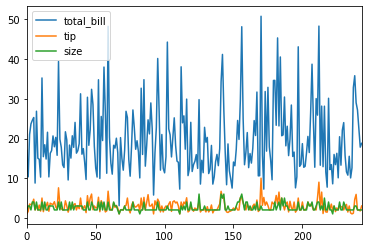

In [3]:
%matplotlib inline 
#график по всем признакам
df.plot()

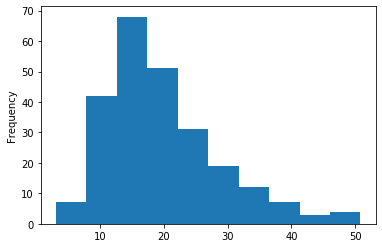

In [7]:
#гистограма с частотами распределения сумм чеков
df['total_bill'].plot(kind = 'hist')

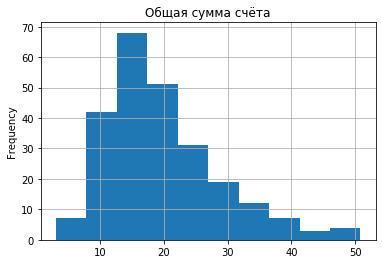

In [8]:
#то же, но с параметрами
df['total_bill'].plot(kind = 'hist', grid = True, title = 'Общая сумма счёта')

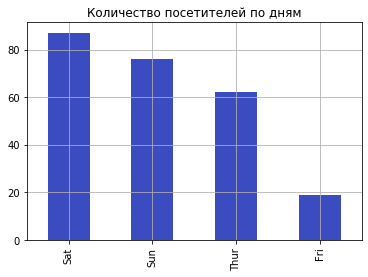

In [15]:
#количество посетителей по дням
df['day'].value_counts().plot(kind = 'bar', 
                              grid = True, 
                               colormap = 'coolwarm',
                              title = 'Количество посетителей по дням')

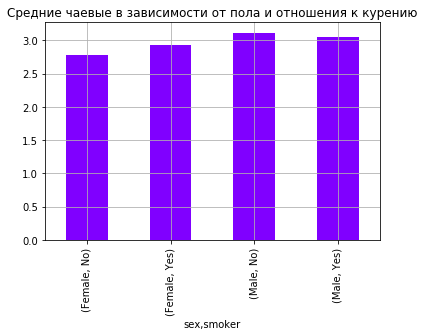

In [4]:
#Средние чаевые в зависимости от пола и отношения к курению
df.groupby(['sex',"smoker"]).tip.mean().plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'rainbow',
                              title = 'Средние чаевые в зависимости от пола и отношения к курению')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DB38B91748>,
      dtype=object)

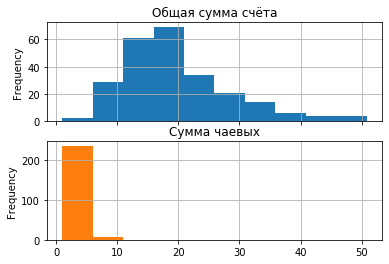

In [28]:
#несколько диаграмм
df[['total_bill', 'tip']].plot(kind = 'hist', 
                               grid = True, 
                               subplots = True, 
                               title = ['Общая сумма счёта', 'Сумма чаевых'], 
                               legend = False)

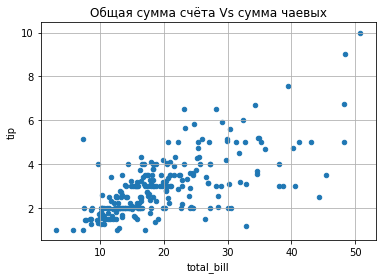

In [29]:
#зависимость между чаевыми и счетом
df.plot(x = 'total_bill', 
        y = 'tip', 
        kind = 'scatter', 
        grid = True, 
        title = 'Общая сумма счёта Vs сумма чаевых')

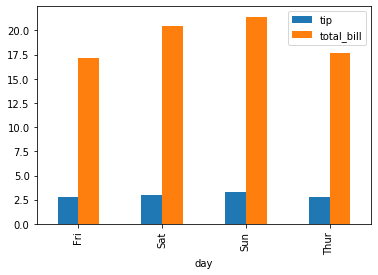

In [32]:
#несколько значений на одном графике
df.pivot_table(values = ['total_bill', 'tip'], 
               index = 'day', 
               aggfunc = 'mean').plot(kind = 'bar')

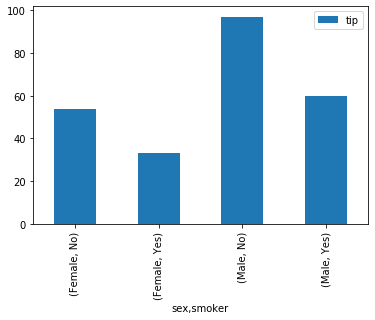

In [33]:
#Размер чаевых в зависимости от пола и отношения к курению
df.pivot_table(values = 'tip', index = ['sex', 'smoker'], aggfunc = 'count').plot(kind = 'bar')

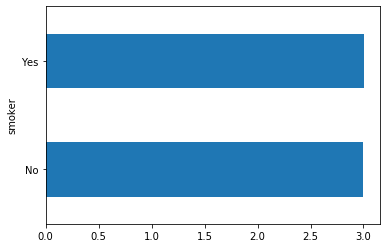

In [36]:
#график, отображающий среднюю сумму чаевых, которые оставляют курящие и некурящие посетители
df.groupby("smoker").tip.mean().plot(kind = "barh")

In [6]:
import matplotlib.pyplot as plt

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <a list of 10 Patch objects>)

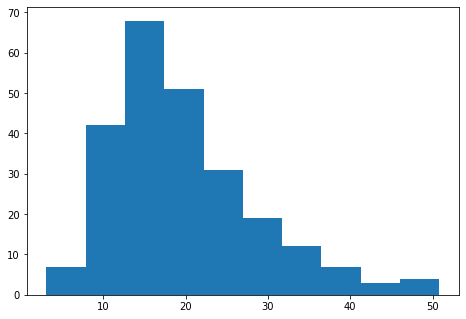

In [43]:
#построение графика с matplotlib
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'])

Text(0.5, 0, 'Сумма заказа, USD')

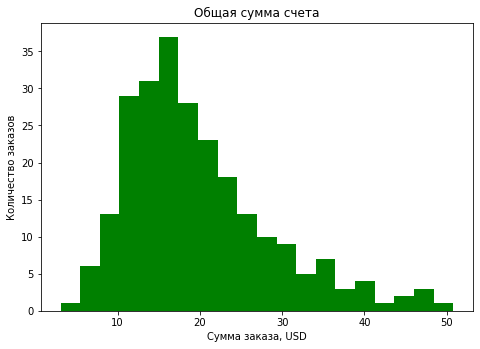

In [44]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'], bins = 20, color = 'green')
axes.set_title('Общая сумма счета')
axes.set_ylabel('Количество заказов')
axes.set_xlabel('Сумма заказа, USD')

Text(0, 0.5, 'Размер чаевых')

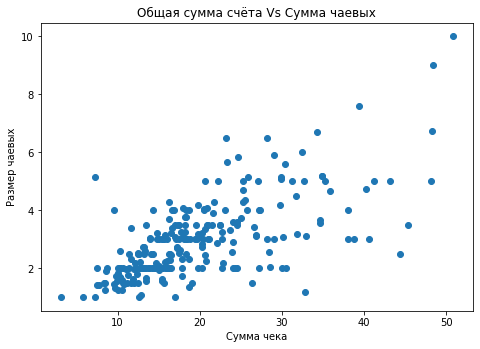

In [45]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x = df['total_bill'], y = df['tip'], marker = 'o')
axes.set_title('Общая сумма счёта Vs Cумма чаевых')
axes.set_xlabel('Сумма чека')
axes.set_ylabel('Размер чаевых')

<BarContainer object of 4 artists>

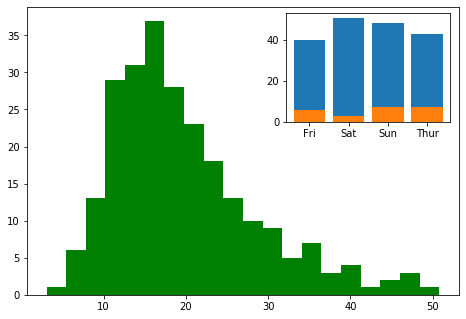

In [74]:
fig = plt.figure()
main_axes = fig.add_axes([0,0,1,1])
insert_axes = fig.add_axes([0.6,0.6,0.38,0.38])
main_axes.hist(df['total_bill'], bins = 20, color = 'green')
tips_per_day = df.groupby("day").total_bill.agg(['min',"max"]).reset_index()
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['max'])
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['min'])

(0, 83)

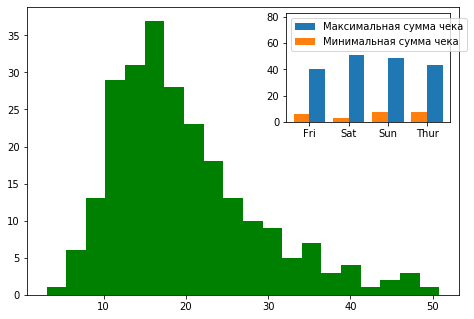

In [90]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'], bins = 20, color = 'green')
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['max'], 
                width = 0.4, align = 'edge', label = "Максимальная сумма чека")
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['min'], 
                width = -0.4, align = 'edge', label = "Минимальная сумма чека")
insert_axes.legend(loc = 2) #легенда в левом верхнем углу
insert_axes.set_ylim(0,83) #чтобы легенда не перекрывала данные

(array([  4.,   0.,   0.,   0., 156.,   0.,   0.,   0.,  38.,   0.,   0.,
          0.,  37.,   0.,   0.,   0.,   5.,   0.,   0.,   4.]),
 array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 ,
        3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25, 5.5 , 5.75, 6.  ]),
 <a list of 20 Patch objects>)

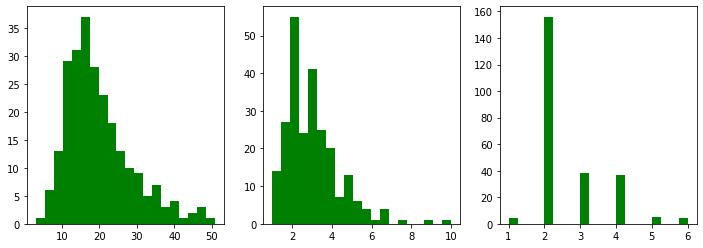

In [9]:
#несколько графиков
fig, axes = plt.subplots(1,3,figsize=(12,4))
axes[0].hist(df['total_bill'], bins = 20, color = 'green')
axes[1].hist(df['tip'], bins = 20, color = 'green')
axes[2].hist(df['size'], bins = 20, color = 'green')

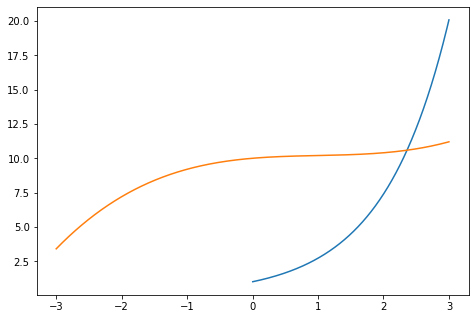

In [105]:
#линейный график
import numpy as np 

x = np.linspace(start=-3., stop=3., num=1000)
y1 = np.exp(x)
y2 = 10 + 0.4*x - 0.3*x**2 + 0.1*x**3

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x[500:], y1[500:]) 
axes.plot(x, y2)

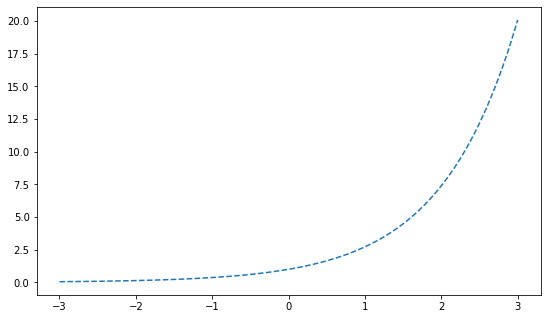

In [128]:
fig = plt.figure(figsize=(7, 4))
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y1, linestyle='--')

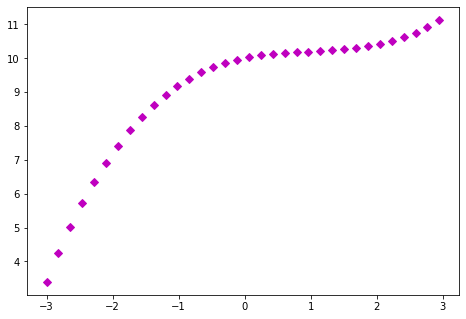

In [124]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x[::30], y2[::30], 'mD')

In [131]:
import seaborn as sns
import warnings; warnings.simplefilter('ignore') # для игнорирования сообщений о несоответствиях типов

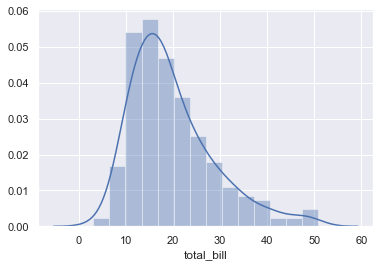

In [133]:
sns.set() #установка стандартных параметров
#гистограмма распределения размера чека
sns.distplot(df.total_bill)

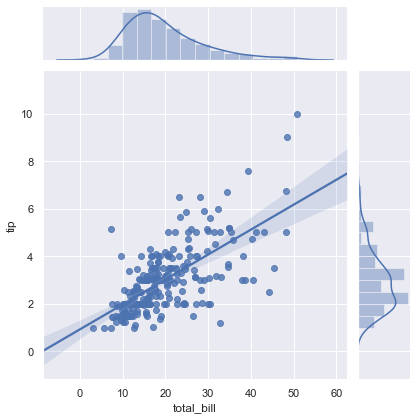

In [139]:
#построчные гистограммы распределения размеров чаевых и чека и их зависимость
sns.jointplot(x = "total_bill", y = "tip", data = df, kind = "reg")

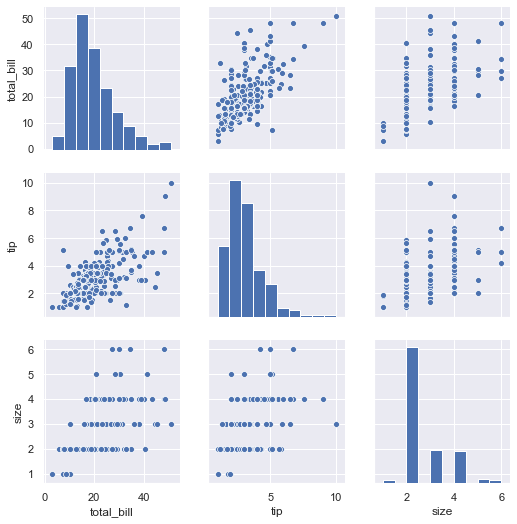

In [137]:
#парный график для анализа взаимосвязи между всеми числовыми показателями
sns.pairplot(df)

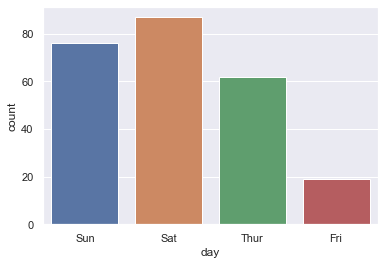

In [141]:
#количество заказов по дням недели
sns.countplot(x="day", data = df)

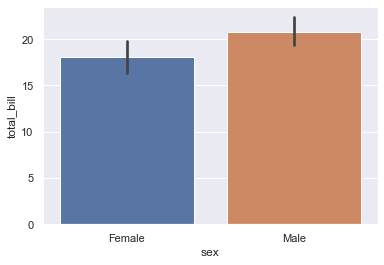

In [142]:
#размер чека в заисимости от пола
sns.barplot(x = "sex", y = "total_bill", data = df)

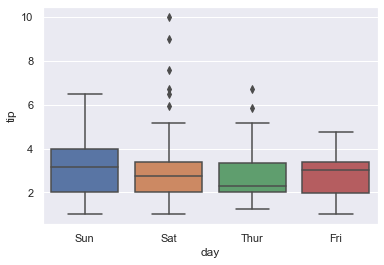

In [143]:
#Боксплот для анализа рамера чаевых по дням недели
sns.boxplot(x="day", y = "tip", data = df)

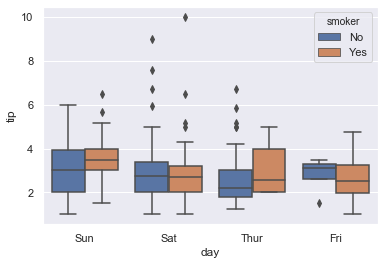

In [144]:
#Боксплот для анализа рамера чаевых, оставляемых курящими/некурящими по дням недели
sns.boxplot(x="day", y = "tip", data = df, hue = "smoker")

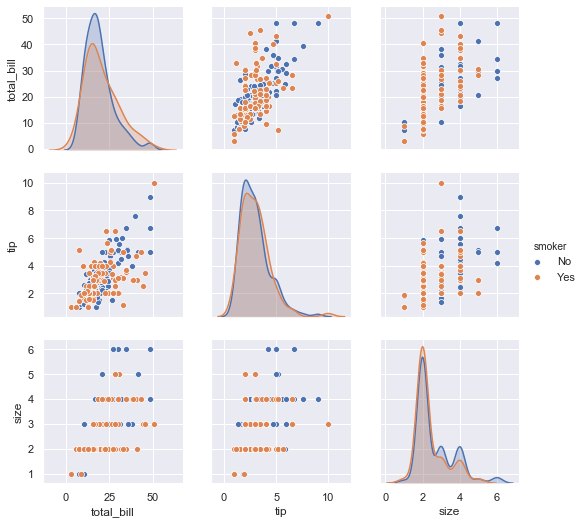

In [145]:
#парный график для анализа взаимосвязи между всеми числовыми показателями
sns.pairplot(df, hue = 'smoker')

In [147]:
correlation = df.corr()
correlation

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


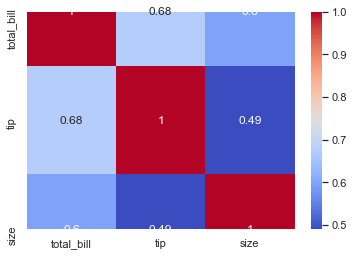

In [150]:
#диаграмма корреляции всех числовых показателй датафрейма
sns.heatmap(correlation, annot = True, cmap = "coolwarm")

In [152]:
!pip install plotly
!pip install cufflinks

  Created wheel for cufflinks: filename=cufflinks-0.17.3-cp37-none-any.whl size=68730 sha256=15eff2ca03477486e46ff8c4da172db876489872e11709076e42a8cd5a3e3e1e
  Stored in directory: C:\Users\lm137\AppData\Local\pip\Cache\wheels\7d\ba\8d\38b672c3e40d8bd22dd60b8e6e29965b43f2b4be4d064e44d5
Successfully built cufflinks


In [155]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected = True)
cf.go_offline()

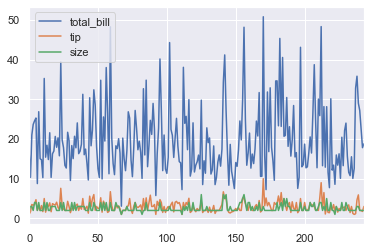

In [157]:
df.plot()

In [158]:
df.iplot()

In [159]:
df[["total_bill","tip"]].iplot(kind = "spread")

In [161]:
#пузырьковая диаграмма
#зависимость размера счета от кол-ва посетителей
df.iplot(kind = "bubble", x = "total_bill", y = "size", size = "tip")

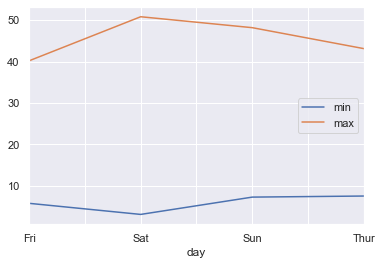

In [162]:
#линейный график: минимальный и максимальный счет по дням недели
df.groupby(by = 'day')['total_bill'].agg(['min','max']).plot()

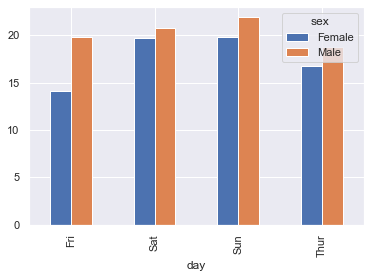

In [163]:
#гистограмма для сравнения среднего размера чека по дням недели для разных полов
df.pivot_table(index = 'day', columns = 'sex', values = 'total_bill', aggfunc = 'mean').plot(kind = 'bar')